In [1]:
# Preferred settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
# Load Spotify dataset
df = pd.read_csv("3_spotify_5000_songs.csv")
df.head()

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'danceability '}>,
        <Axes: title={'center': 'energy   '}>,
        <Axes: title={'center': 'key '}>],
       [<Axes: title={'center': 'loudness '}>,
        <Axes: title={'center': 'mode '}>,
        <Axes: title={'center': 'speechiness '}>,
        <Axes: title={'center': 'acousticness '}>],
       [<Axes: title={'center': 'instrumentalness '}>,
        <Axes: title={'center': 'liveness '}>,
        <Axes: title={'center': 'valence '}>,
        <Axes: title={'center': 'tempo   '}>],
       [<Axes: title={'center': 'duration_ms '}>,
        <Axes: title={'center': 'time_signature '}>, <Axes: >, <Axes: >]],
      dtype=object)

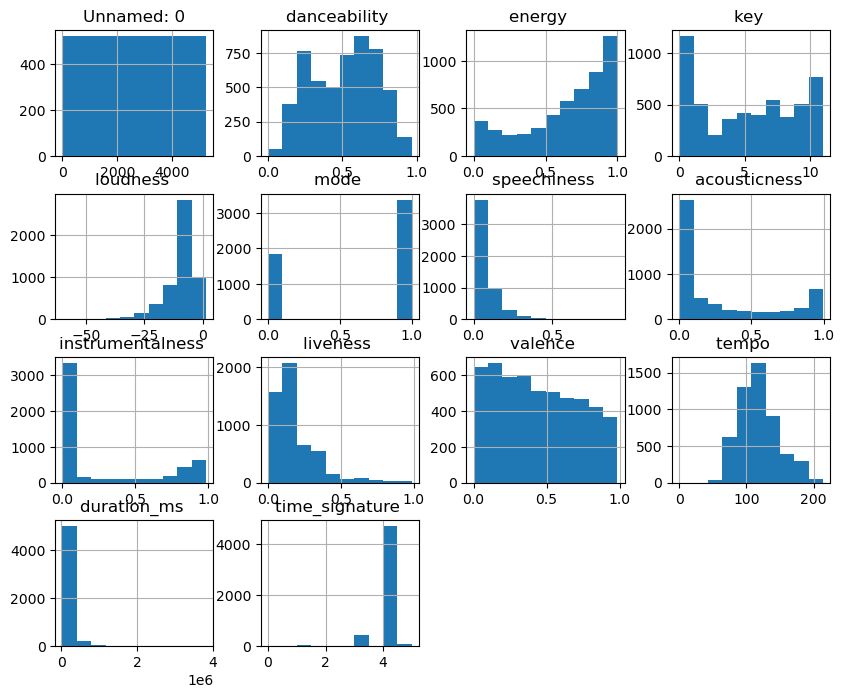

In [3]:
df.hist(figsize=(10, 8))

In [4]:
features = ['danceability ',
       'energy   ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ']

X = df[features]

In [5]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

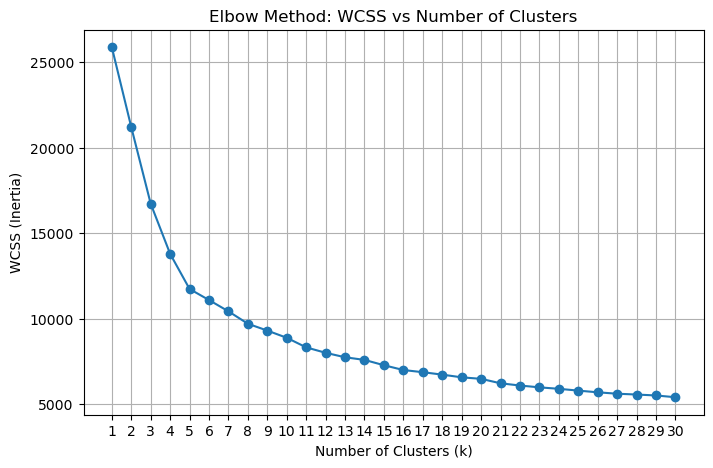

In [ ]:
wcss = []

cluster_range = range(1, 31)  # Try k from 1 to 30

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

plt.figure(figsize=(8,5))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method: WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

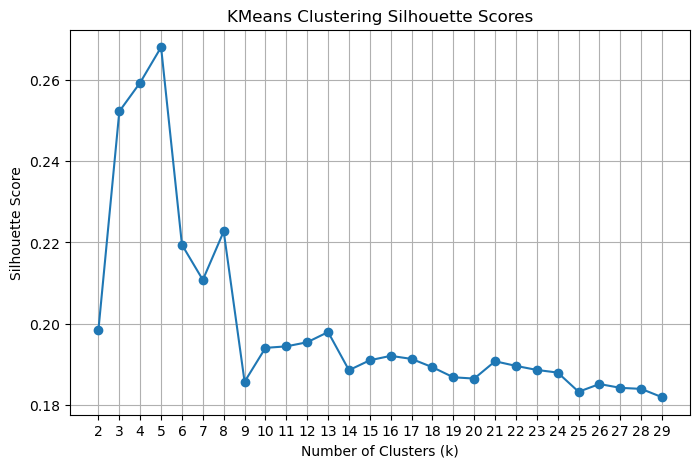

In [ ]:
silhouette_scores = []
cluster_range = range(2, 30)  # Silhouette score requires at least 2 clusters

for k in cluster_range:
    km = KMeans(n_clusters=k, random_state = 42)
    labels = km.fit_predict(X_scaled)  # Use pca or scaled data, as pca does not change the result, we'll stick with scaled for now
    
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('KMeans Clustering Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [21]:
def find_best_k(X_scaled, k_min=10, k_max=35):
    best_k = None
    best_score = -1
    scores = {}
    for k in range(k_min, k_max+1):
        km = KMeans(n_clusters=k, random_state=42)
        labels = km.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        scores[k] = score
        if score > best_score:
            best_k = k
            best_score = score
    return best_k, best_score, scores

best_k, best_score, all_scores = find_best_k(X_scaled)
print("Best k:", best_k, "with silhouette score:", best_score)



Best k: 13 with silhouette score: 0.19791336821440525


In [9]:
best_k =13

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=best_k)
df['Cluster_Agglomerative'] = agglo.fit_predict(X_scaled)


In [11]:
print("KMeans Silhouette Score:", silhouette_score(X_scaled, df['Cluster_KMeans']))
dbscan_mask = df['Cluster_DBSCAN'] != -1
if dbscan_mask.sum() > 0:
    score_dbscan = silhouette_score(X_scaled[dbscan_mask], df['Cluster_DBSCAN'][dbscan_mask])
    print("DBSCAN Silhouette Score:", score_dbscan)
else:
    print("DBSCAN found no clusters (all points noise), silhouette score cannot be computed")
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, df['Cluster_Agglomerative']))

KMeans Silhouette Score: 0.19791336821440525
DBSCAN Silhouette Score: 0.310208744771981
Agglomerative Silhouette Score: 0.15877472342020688


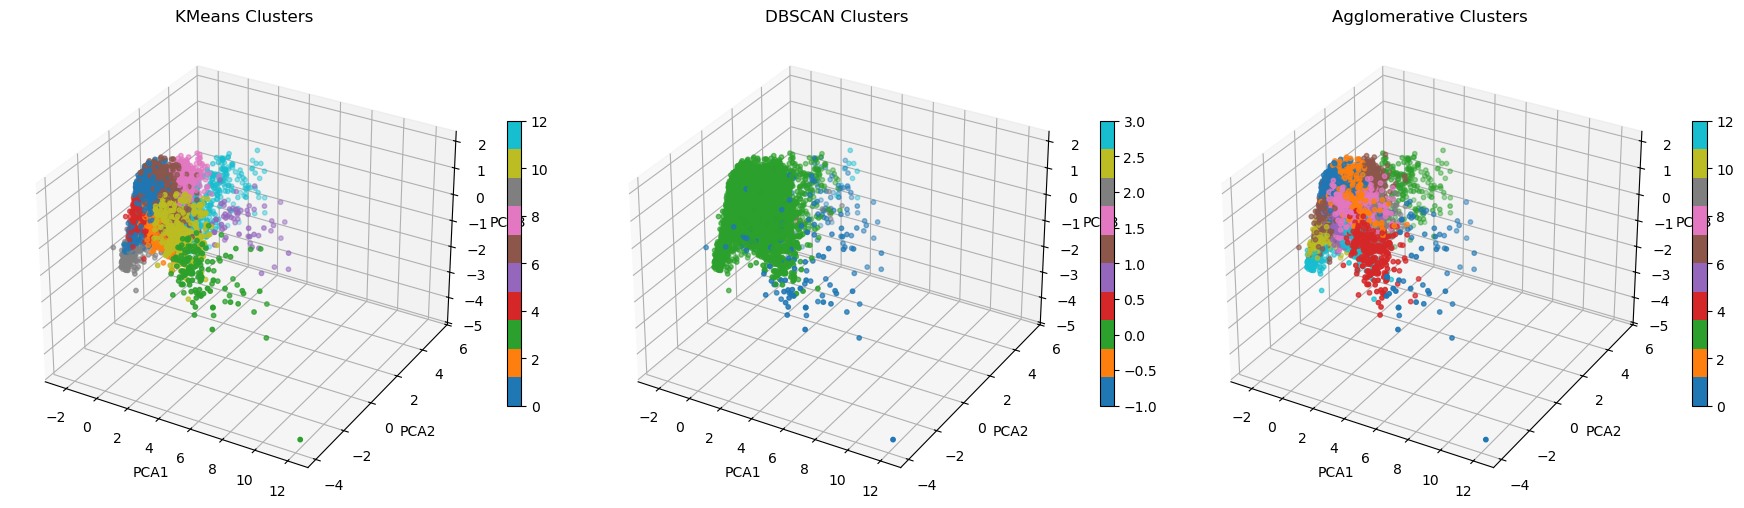

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assume X_scaled is your scaled feature data

# Step 1: Apply PCA with 3 components
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Step 2: Plot clusters in 3D for each clustering method
fig = plt.figure(figsize=(18, 6))

# KMeans
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df['Cluster_KMeans'], cmap='tab10', s=10)
ax1.set_title('KMeans Clusters')
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')
fig.colorbar(scatter1, ax=ax1, shrink=0.5)

# DBSCAN
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df['Cluster_DBSCAN'], cmap='tab10', s=10)
ax2.set_title('DBSCAN Clusters')
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_zlabel('PCA3')
fig.colorbar(scatter2, ax=ax2, shrink=0.5)

# Agglomerative
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=df['Cluster_Agglomerative'], cmap='tab10', s=10)
ax3.set_title('Agglomerative Clusters')
ax3.set_xlabel('PCA1')
ax3.set_ylabel('PCA2')
ax3.set_zlabel('PCA3')
fig.colorbar(scatter3, ax=ax3, shrink=0.5)

plt.tight_layout()
plt.show()


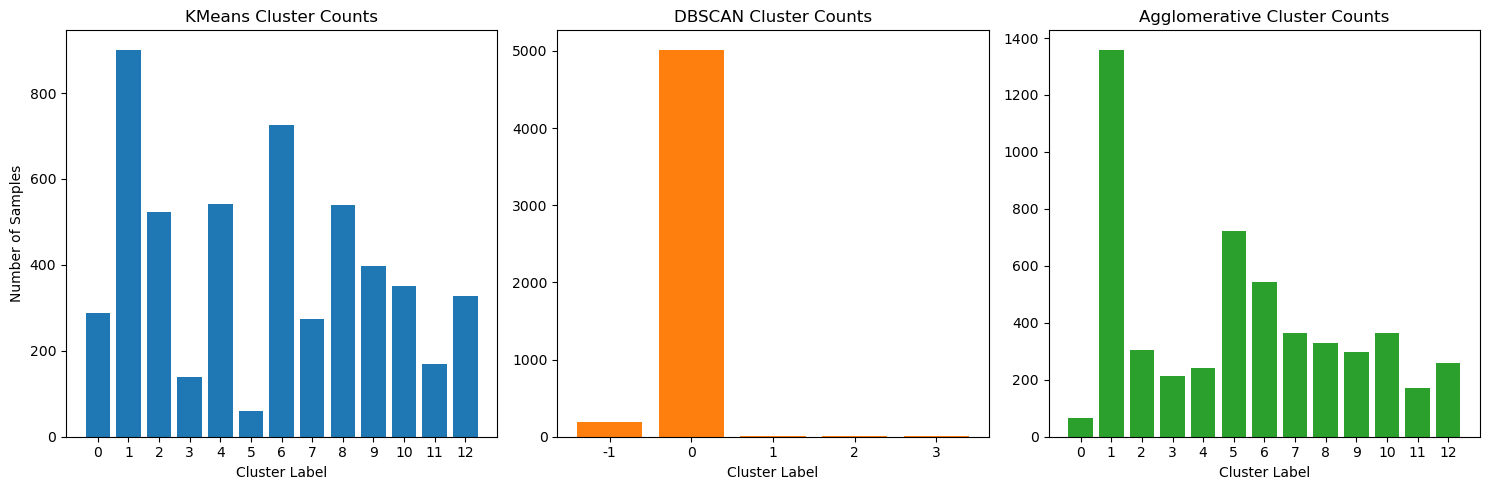

In [22]:
import matplotlib.pyplot as plt

# Get cluster counts
kmeans_counts = df['Cluster_KMeans'].value_counts().sort_index()
dbscan_counts = df['Cluster_DBSCAN'].value_counts().sort_index()
agglo_counts = df['Cluster_Agglomerative'].value_counts().sort_index()

# Create bar plots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(kmeans_counts.index.astype(str), kmeans_counts.values, color='C0')
axes[0].set_title('KMeans Cluster Counts')
axes[0].set_xlabel('Cluster Label')
axes[0].set_ylabel('Number of Samples')

axes[1].bar(dbscan_counts.index.astype(str), dbscan_counts.values, color='C1')
axes[1].set_title('DBSCAN Cluster Counts')
axes[1].set_xlabel('Cluster Label')

axes[2].bar(agglo_counts.index.astype(str), agglo_counts.values, color='C2')
axes[2].set_title('Agglomerative Cluster Counts')
axes[2].set_xlabel('Cluster Label')

plt.tight_layout()
plt.show()


In [17]:
def radar_chart(df):
    import plotly.graph_objects as go

    scatter_objects = []

    categories = [col for col in df.columns if col != "Cluster_KMeans"]

    cluster_feat_means = df.groupby(by="Cluster_KMeans").mean()

    for cluster in sorted(df['Cluster_KMeans'].unique()):
        cluster_means = cluster_feat_means.loc[cluster, categories]
        cluster_scatter = go.Scatterpolar(
            r=cluster_means,
            theta=categories,
            fill='toself',
            name=f'Cluster {cluster}'
        )
        scatter_objects.append(cluster_scatter)

    fig = go.Figure()
    fig.add_traces(scatter_objects)

    fig.update_layout(
        title_text='Radar chart of mean feature values by cluster',
        height=600,
        width=800,
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=True
    )
    fig.show()


In [23]:
df_1 = df[['danceability ',
       'energy   ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', "Cluster_KMeans"]]

In [24]:
df_1.dtypes

danceability         float64
energy               float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
Cluster_KMeans         int32
dtype: object

In [25]:
radar_chart(df_1)